In [1]:
from virusPropagationModel import ModeledPopulatedWorld,Simulation
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import timeit
 

In [24]:
start = timeit.default_timer()
modeledWorld1 = ModeledPopulatedWorld(1000,100, world_from_file=False, geofile_name='datafiles/Buildings_Gangelt_MA_1.csv')
stop = timeit.default_timer()
print('required time: ', stop - start)  

required time:  4.972014486000035


{'home': 4913, 'work': 81, 'public_place': 12, 'school': 2}


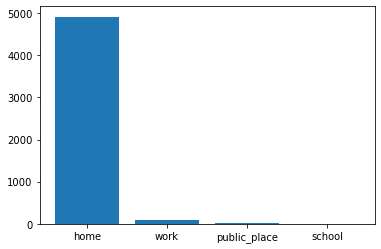

In [12]:
loc_counts = modeledWorld1.plot_location_type_distribution()
print(loc_counts)

In [26]:
len(modeledWorld1.people)

761

In [25]:
start = timeit.default_timer()
simulation1 = Simulation(modeledWorld1,200)
stop = timeit.default_timer()
print('required time: ', stop - start)  

required time:  2.687855575999947


In [28]:
df  = simulation1.simulation_timecourse

In [27]:
df_1 = df.drop(columns= ['WasInfected', 'Diagnosed', 'Hospitalized',
       'ICUed'])
sum(df['status']=='I')

0

In [29]:
loc_stat=simulation1.get_location_and_status()

In [33]:
loc_stat[loc_stat['time']==200]['R'].sum()

610.0

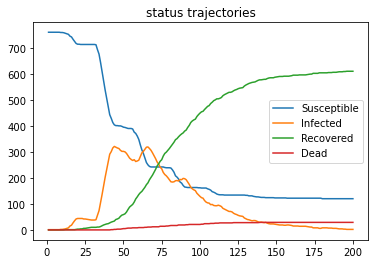

In [31]:
simulation1.plot_status_timecourse()


In [11]:
df_b =pd.read_csv('datafiles/Buildings_Gangelt_MA_1.csv')
print(len(df_b))
print(df_b.columns)
print(len(modeledWorld1.locations))

5019
Index(['Unnamed: 0', 'building', 'geometry', 'amenity', 'shop', 'leisure',
       'sport', 'healthcare', 'healthcare:speciality', 'building:levels',
       'building_coordinates_x', 'building_coordinates_y', 'building_area',
       'neighbourhood'],
      dtype='object')
561


In [6]:
df_1 = df.drop(columns= ['WasInfected', 'Diagnosed', 'Hospitalized',
       'ICUed'])


In [7]:
d=pd.pivot_table(df_1, values='h_ID', index=['loc','time'],
                     columns=['status'],aggfunc='count')


In [9]:
table=d.reset_index().fillna(0)
table[table['time']==200]['S'].sum()
table

status,loc,time,R,S
0,0,1,0.0,1.0
1,0,2,0.0,1.0
2,0,3,0.0,1.0
3,0,4,0.0,1.0
4,0,5,0.0,1.0
...,...,...,...,...
82445,563,196,0.0,1.0
82446,563,197,0.0,1.0
82447,563,198,0.0,1.0
82448,563,199,0.0,1.0


In [308]:
t= df_1.groupby(['time','loc','status'])['status'].count()
#t = (df_1.groupby(['time','loc','status'])
 #        .apply(lambda x: (x['status']== 'S').sum())
 #        .reset_index(name='count'))
#t

In [312]:
t.to_frame()

status
time loc status        
1    0   S            2
     1   S            2
     2   S            3
     3   S            1
     4   S            1
...                 ...
200  558 S            3
     559 S            1
     560 S            1
     562 S            2
     563 S            3

[115733 rows x 1 columns]

In [287]:
t.pivot(index=['time', 'loc'], columns='status', values='h_ID')#, fill_value=0)

,h_ID,loc,time
status,,,
D,2314,2314,2314
I,23381,23381,23381
R,76874,76874,76874
S,198631,198631,198631


In [118]:
df_time

df_c = pd.concat([d1g,d2],)
df_c.fillna(0,inplace=True)
df_c.reset_index(drop=True)

,I,R,S,loc
0,75,249.0,247,2
1,1,0.0,1505,1


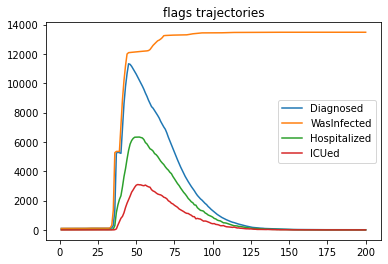

In [22]:
simulation1.plot_flags_timecourse()


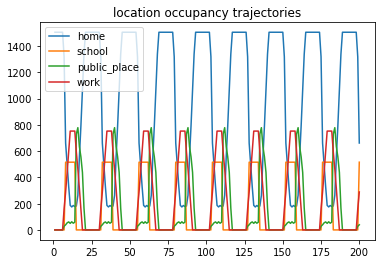

In [13]:
simulation1.plot_location_type_occupancy_timecourse()

In [14]:
simulation1.export_time_courses_as_csvs(identifier='testing') 
# Exports the CSVs to the outputs folder.
# Files marked with the identifier 'testing' get automatically deleted by the testrunner.
# Use a different identifier name if you want your outputs to remain in the folder.
